<a href="https://colab.research.google.com/github/Antonio-B85/challenge-Parte-2--TelecomX/blob/main/TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.- Librerías Básicas

In [1]:
# importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')

# Ajustar la configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Ajustar la configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)
# Ajustar la configuración para mostrar más caracteres en cada celda
pd.set_option('display.max_colwidth', None)


#2.- Carga de Datos

In [2]:
# conectar a Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Rutas Drive
path = '/content/drive/MyDrive/Data_Science/Challenges/TelecomX-2/TelecomX_Data_Estandarizado.csv'

datos = pd.read_csv(path)
datos_org = datos.copy()
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.913333


#3.- Análisis Inicial de Datos

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [5]:
datos.shape

(7267, 22)

In [6]:
datos.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

#4.- Transformación de Datos

##4.1.- Eliminar Columnas y Filas Irrelevantes

In [7]:
# Eliminar la columna 'customerID'
datos = datos.drop(columns=['customerID'])
# Mostrar el DataFrame resultante
datos.head(3)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667


In [8]:
# Datos de la columna Churn
datos['Churn'].unique().tolist()

['No', 'Yes', 'No Info']

In [9]:
# Eliminar Filas "No Info" columna "Churn"
datos = datos[datos['Churn'] != 'No Info']

In [10]:
# Valido solo datos "Yes" o "No" en la Columna Churn
datos['Churn'].unique().tolist()

['No', 'Yes']

In [11]:
# Shaper original (7267, 22)
datos.shape

(7043, 21)

In [12]:
# Restablecer los índices
datos.reset_index(drop=True, inplace=True)
datos.tail()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
7038,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,24.763333
7039,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,62.456667
7040,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,3.091667
7041,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,154.255000
7042,No,Male,0,Yes,Yes,63,No,No phone service,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.60,123.586667


##4.2.- Tratar Columnas Categóricas Binarias


In [13]:
datos.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.296277,76.109876
std,0.368612,24.559481,30.090047,2265.000260,75.500009
min,0.000000,0.000000,18.250000,18.800000,0.626667
25%,0.000000,9.000000,35.500000,402.225000,13.407500
50%,0.000000,29.000000,70.350000,1400.550000,46.685000
75%,0.000000,55.000000,89.850000,3786.600000,126.220000
max,1.000000,72.000000,118.750000,8684.800000,289.493333


In [14]:
datos.describe(include='O')

,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [15]:
#Ajuste de datos
datos['Churn'] = datos['Churn'].replace({'No': 0, 'Yes': 1})
datos['gender'] = datos['gender'].replace({'Female': 0, 'Male': 1})
datos['Partner'] = datos['Partner'].replace({'No': 0, 'Yes': 1})
datos['Dependents'] = datos['Dependents'].replace({'No': 0, 'Yes': 1})
datos['PhoneService'] = datos['PhoneService'].replace({'No': 0, 'Yes': 1})
datos['PaperlessBilling'] = datos['PaperlessBilling'].replace({'No': 0, 'Yes': 1})

In [16]:
datos.sample(4)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
1007,1,1,0,0,0,1,1,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,1,Electronic check,89.10,89.10,2.970000
2613,1,1,0,0,0,1,1,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,1,Electronic check,88.35,88.35,2.945000
924,1,1,0,1,0,63,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,103.40,6603.00,220.100000
2334,0,1,1,1,0,36,1,No,DSL,No,No,Yes,Yes,No,No,One year,0,Credit card (automatic),54.10,1992.85,66.428333


In [17]:
# Validando columnas trabajadas no aparecen con mas de un valor
datos.describe(include='O')

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,3,3,3,3,3,3,3,3,3,4
top,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


##4.3.- Tratar Columnas Categóricas No Binarias

In [18]:
# Muestra todas las columnas con 3 o más valores
datos.describe(include='O')

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,3,3,3,3,3,3,3,3,3,4
top,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
freq,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


###4.3.1.- Método OneHotEncoder

In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [20]:
datos.describe(include='O').columns

Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod'],
      dtype='object')

In [21]:
col_categoricas = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod']

col_categoricas

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [22]:
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    col_categoricas),
    remainder='passthrough')

datos = one_hot_enc.fit_transform(datos)
datos = pd.DataFrame(datos, columns=one_hot_enc.get_feature_names_out())
datos.columns

Index(['onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No'

In [23]:
# Renombrar Columnas no tratadas a su nombre originar sin "remainder"
datos.columns = datos.columns.str.replace('^remainder__', '', regex=True)
datos.columns

Index(['onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__MultipleLines_Yes',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_No internet service',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_No internet service',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_No internet service',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_No internet service',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_No internet service',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No'

In [24]:
datos.sample(4)

,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No,onehotencoder__OnlineBackup_No internet service,onehotencoder__OnlineBackup_Yes,onehotencoder__DeviceProtection_No,onehotencoder__DeviceProtection_No internet service,onehotencoder__DeviceProtection_Yes,onehotencoder__TechSupport_No,onehotencoder__TechSupport_No internet service,onehotencoder__TechSupport_Yes,onehotencoder__StreamingTV_No,onehotencoder__StreamingTV_No internet service,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_No,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
1870,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8.0,1.0,0.0,20.05,163.60,5.453333
2238,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,65.0,1.0,0.0,105.10,6631.85,221.061667
4982,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,50.55,235.65,7.855000
3074,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,20.15,84.50,2.816667


##4.4.- Normalización de datos

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
len(datos.columns)

42

In [28]:
# Selecciona las columnas que deseas normalizar
columnas_a_normalizar = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

In [29]:
# Filtra las columnas que realmente existen en el DataFrame
columnas_existentes = [col for col in columnas_a_normalizar if col in datos.columns]

In [30]:
# Aplica la normalización solo a las columnas existentes
if columnas_existentes:
  datos[columnas_existentes] = scaler.fit_transform(datos[columnas_existentes])
else:
  print("No hay columnas para normalizar.")

In [31]:
datos.sample(5)

,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No,onehotencoder__OnlineBackup_No internet service,onehotencoder__OnlineBackup_Yes,onehotencoder__DeviceProtection_No,onehotencoder__DeviceProtection_No internet service,onehotencoder__DeviceProtection_Yes,onehotencoder__TechSupport_No,onehotencoder__TechSupport_No internet service,onehotencoder__TechSupport_Yes,onehotencoder__StreamingTV_No,onehotencoder__StreamingTV_No internet service,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_No,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
193,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.152778,0.0,1.0,0.220398,0.046596,0.046596
4410,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.791667,1.0,1.0,0.013433,0.132904,0.132904
5892,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.444444,1.0,1.0,0.745771,0.336049,0.336049
3211,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.347222,1.0,1.0,0.717910,0.249227,0.249227
3007,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.944444,1.0,0.0,0.961692,0.902925,0.902925


##4.5.- Columnas Relacionadas

In [32]:
datos.head()

,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_No internet service,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No,onehotencoder__OnlineBackup_No internet service,onehotencoder__OnlineBackup_Yes,onehotencoder__DeviceProtection_No,onehotencoder__DeviceProtection_No internet service,onehotencoder__DeviceProtection_Yes,onehotencoder__TechSupport_No,onehotencoder__TechSupport_No internet service,onehotencoder__TechSupport_Yes,onehotencoder__StreamingTV_No,onehotencoder__StreamingTV_No internet service,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_No,onehotencoder__StreamingMovies_No internet service,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.125000,1.0,1.0,0.471144,0.066294,0.066294
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.125000,1.0,0.0,0.414428,0.060420,0.060420
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.055556,1.0,1.0,0.553731,0.030239,0.030239
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.180556,1.0,1.0,0.793532,0.140670,0.140670
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.041667,1.0,1.0,0.653234,0.028687,0.028687


In [33]:
columnas_corr = datos.corr()

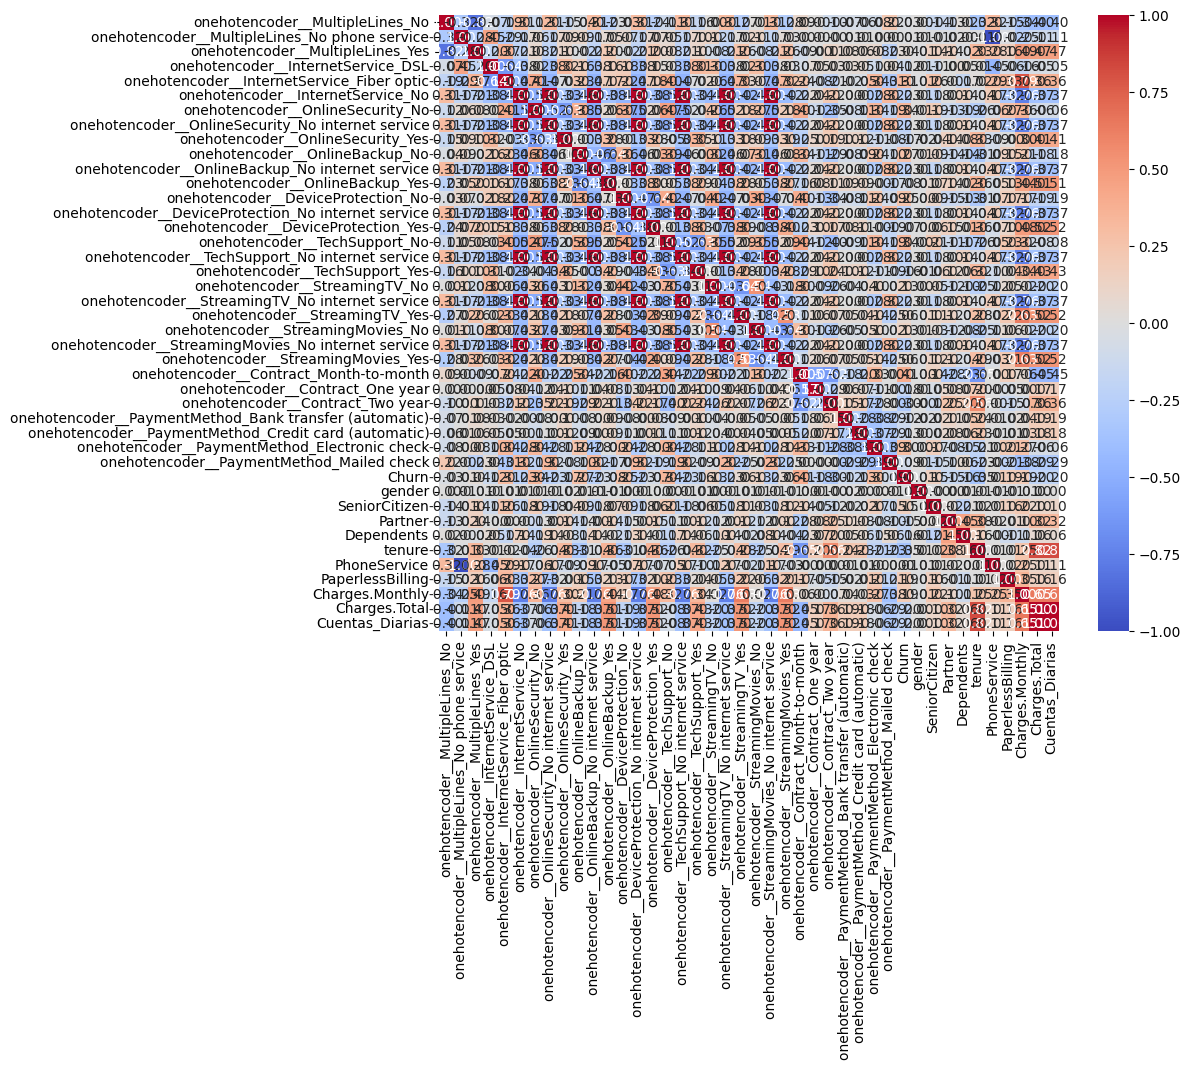

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(columnas_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [35]:
umbral = 0.8
columnas_a_eliminar = set()
for i in range(len(columnas_corr.columns)):
  for j in range(i):
    if abs(columnas_corr.iloc[i, j]) > umbral:
      colname = columnas_corr.columns[i]
      columnas_a_eliminar.add(colname)

columnas_a_eliminar

{'Charges.Total',
 'Cuentas_Diarias',
 'PhoneService',
 'onehotencoder__DeviceProtection_No internet service',
 'onehotencoder__MultipleLines_Yes',
 'onehotencoder__OnlineBackup_No internet service',
 'onehotencoder__OnlineSecurity_No internet service',
 'onehotencoder__StreamingMovies_No internet service',
 'onehotencoder__StreamingTV_No internet service',
 'onehotencoder__TechSupport_No internet service'}

In [36]:
datos = datos.drop(columns=columnas_a_eliminar)
datos_org_limpios = datos #Respaldo para pruebas
datos.sample(5)

,onehotencoder__MultipleLines_No,onehotencoder__MultipleLines_No phone service,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_No,onehotencoder__OnlineSecurity_Yes,onehotencoder__OnlineBackup_No,onehotencoder__OnlineBackup_Yes,onehotencoder__DeviceProtection_No,onehotencoder__DeviceProtection_Yes,onehotencoder__TechSupport_No,onehotencoder__TechSupport_Yes,onehotencoder__StreamingTV_No,onehotencoder__StreamingTV_Yes,onehotencoder__StreamingMovies_No,onehotencoder__StreamingMovies_Yes,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,Charges.Monthly
2214,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333,1.0,0.862687
2007,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.555556,0.0,0.622388
6148,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.013889,1.0,0.265174
3893,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.458333,1.0,0.424378
6351,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.013889,1.0,0.319403


In [37]:
len(datos.columns)

32

#5.- Análisis gráfico del conjunto de datos

##5.1.- Verificación de la Proporción de Cancelación (Churn)

In [38]:
datos_churn = datos.groupby('Churn').size().reset_index(name='count')
datos_churn

,Churn,count
0,0.0,5174
1,1.0,1869


In [39]:
datos_churn.columns

Index(['Churn', 'count'], dtype='object')

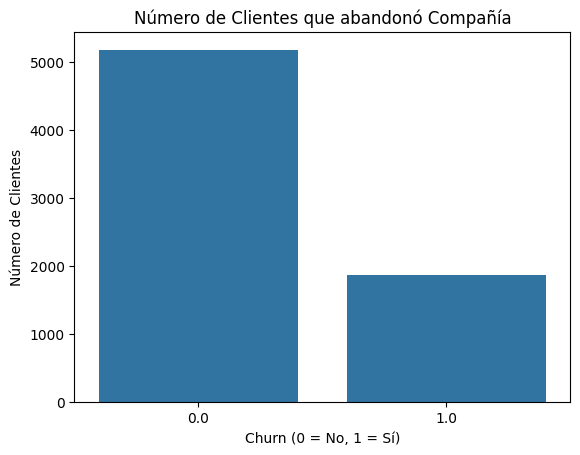

In [40]:
import seaborn as sns

sns.barplot(data=datos_churn, x='Churn', y='count')
plt.title('Número de Clientes que abandonó Compañía')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Número de Clientes')
plt.show()

##5.2.- Análisis Dirigido

###5.2.1.- Tiempo de contrato × Cancelación

In [41]:
datos_org.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

In [42]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   onehotencoder__MultipleLines_No                         7043 non-null   float64
 1   onehotencoder__MultipleLines_No phone service           7043 non-null   float64
 2   onehotencoder__InternetService_DSL                      7043 non-null   float64
 3   onehotencoder__InternetService_Fiber optic              7043 non-null   float64
 4   onehotencoder__InternetService_No                       7043 non-null   float64
 5   onehotencoder__OnlineSecurity_No                        7043 non-null   float64
 6   onehotencoder__OnlineSecurity_Yes                       7043 non-null   float64
 7   onehotencoder__OnlineBackup_No                          7043 non-null   float64
 8   onehotencoder__OnlineBackup_Yes       

In [43]:
columnas_contrato = [col for col in datos_org.columns if 'Contract' in col]
columnas_analisis = columnas_contrato + ['Churn']
# Crear nuevo DataFrame
df_contrato_churn = datos_org[columnas_analisis].copy()
df_contrato_churn.head()

,Contract,Churn
0,One year,No
1,Month-to-month,No
2,Month-to-month,Yes
3,Month-to-month,Yes
4,Month-to-month,Yes


In [44]:
valores_unicos_churn = df_contrato_churn['Churn'].unique().tolist()
print(valores_unicos_churn)

['No', 'Yes', 'No Info']


In [45]:
# Eliminar las filas donde 'Churn' es igual a 'No Info'
df_contrato_churn = df_contrato_churn[df_contrato_churn['Churn'] != 'No Info']
conteos_valores = df_contrato_churn['Churn'].value_counts()
conteos_valores

,count
Churn,
No,5174
Yes,1869


In [46]:
df_contrato_churn['Churn'] = df_contrato_churn['Churn'].replace({'No': 0, 'Yes': 1})
df_contrato_churn.head()

,Contract,Churn
0,One year,0
1,Month-to-month,0
2,Month-to-month,1
3,Month-to-month,1
4,Month-to-month,1


In [47]:
df_contrato_churn.columns

Index(['Contract', 'Churn'], dtype='object')

In [48]:
valores_unicos_lista = df_contrato_churn['Contract'].unique().tolist()
print(valores_unicos_lista)

['One year', 'Month-to-month', 'Two year']


In [49]:
df_contrato_churn.columns

Index(['Contract', 'Churn'], dtype='object')

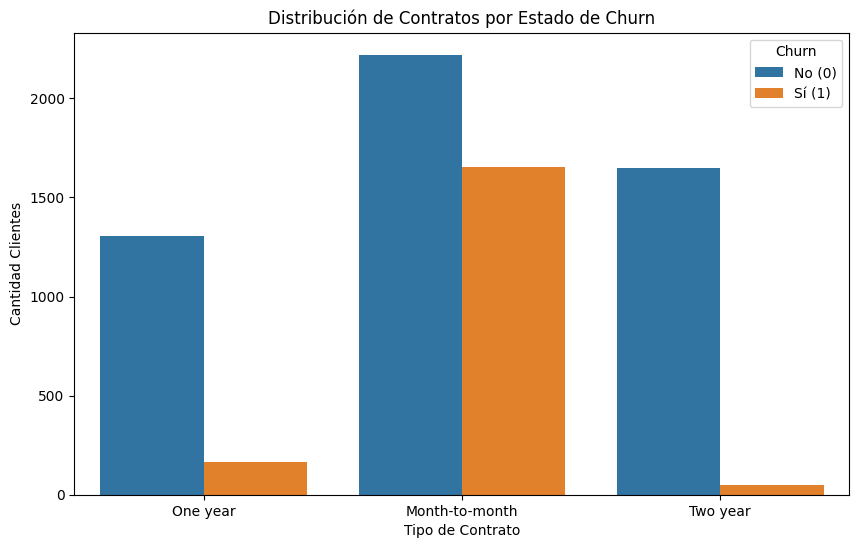

In [50]:
# Gráfico con distribución por Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_contrato_churn, x='Contract', hue='Churn')
plt.title('Distribución de Contratos por Estado de Churn')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad Clientes')
plt.legend(title='Churn', labels=['No (0)', 'Sí (1)'])
plt.show()

###5.2.2.- Gasto total × Cancelación

In [51]:
datos_org.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')

In [52]:
columnas_gasto_total = [col for col in datos_org.columns if 'Charges.Total' in col]
columnas_analisis = columnas_gasto_total + ['Churn']
# Crear nuevo DataFrame
df_gasto_total_churn = datos_org[columnas_analisis].copy()
df_gasto_total_churn.head()

,Charges.Total,Churn
0,593.30,No
1,542.40,No
2,280.85,Yes
3,1237.85,Yes
4,267.40,Yes


In [53]:
# Eliminar las filas donde 'Churn' es igual a 'No Info'
df_gasto_total_churn = df_gasto_total_churn[df_gasto_total_churn['Churn'] != 'No Info']
conteos_valores = df_gasto_total_churn['Churn'].value_counts()
conteos_valores

,count
Churn,
No,5174
Yes,1869


In [54]:
df_gasto_total_churn['Churn'] = df_gasto_total_churn['Churn'].replace({'No': 0, 'Yes': 1})
df_gasto_total_churn.head()

,Charges.Total,Churn
0,593.30,0
1,542.40,0
2,280.85,1
3,1237.85,1
4,267.40,1


In [55]:
# Agrupar los datos por Churn y sumar los Charges.total
df_gasto_total_churn = df_gasto_total_churn.groupby('Churn')['Charges.Total'].sum().reset_index()
df_gasto_total_churn

,Churn,Charges.Total
0,0,1.321833e+07
1,1,2.862927e+06


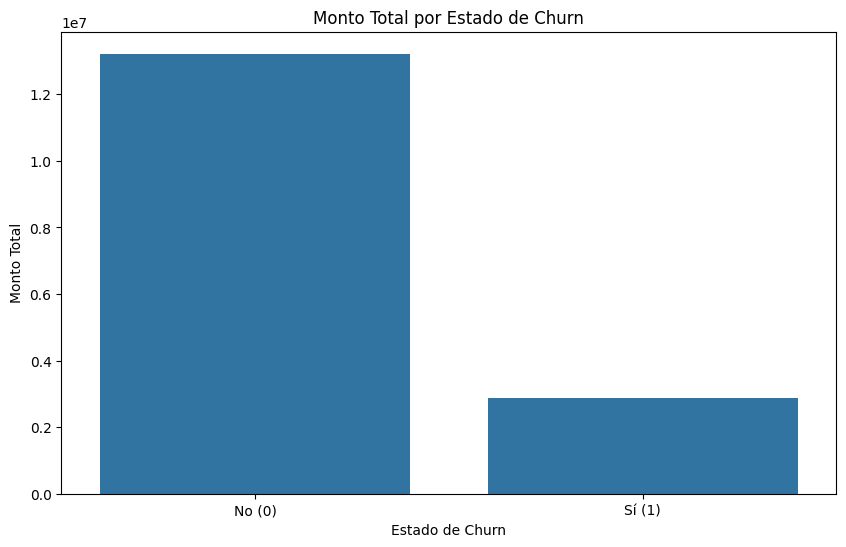

In [56]:
# Gráfico con distribución por Churn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_gasto_total_churn, x='Churn', y='Charges.Total')
plt.title('Monto Total por Estado de Churn')
plt.xlabel('Estado de Churn')
plt.ylabel('Monto Total')
plt.xticks(ticks=[0, 1], labels=['No (0)', 'Sí (1)'])  # Etiquetas personalizadas para el eje X
plt.show()

##5.3.- Analizando la distribución de datos

In [57]:
datos_org.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,8.913333


In [58]:
def ancho_bin(df, columna):
  q75, q25 = np.percentile(df[columna], [75, 25])
  iqr = q75 - q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return ancho

In [59]:
binwidth = ancho_bin(datos_org, 'tenure')
binwidth

np.float64(4.7497356641408635)

<Axes: xlabel='tenure', ylabel='Count'>

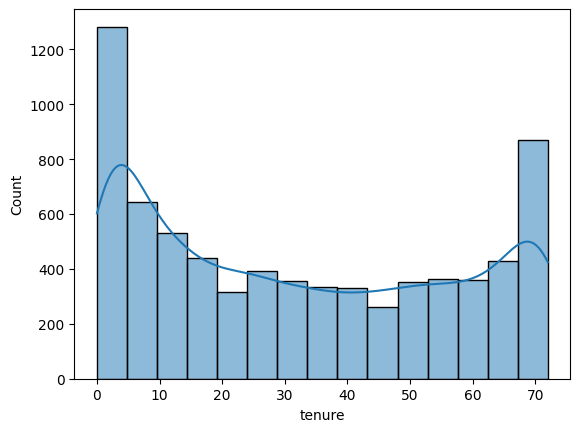

In [60]:
sns.histplot(data=datos_org, x='tenure', kde=True, binwidth = binwidth)

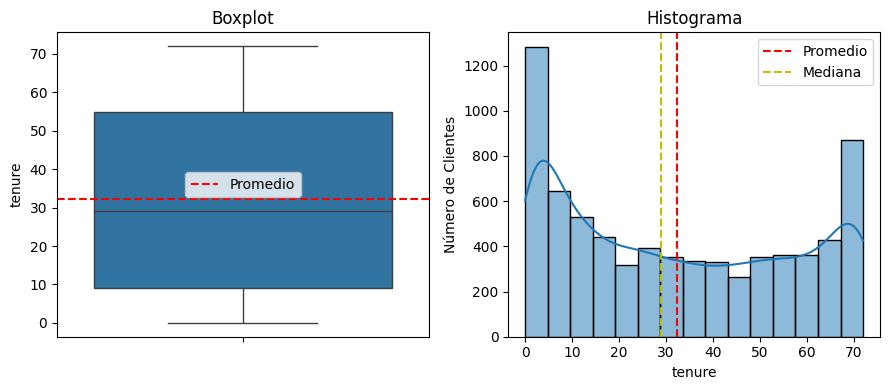

In [61]:
ternure_promedio = datos_org['tenure'].mean()
ternure_mediana = datos_org['tenure'].median()

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=datos_org, y='tenure', ax=ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=ternure_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()


binwidth = ancho_bin(datos_org, 'tenure')
sns.histplot(data=datos_org, x='tenure',ax=ax[1], kde=True, binwidth = binwidth)
plt.ylabel('Número de Clientes')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=ternure_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(x=ternure_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

plt.tight_layout()

plt.show()

#6.- Definiendo una baseline

In [62]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [63]:
len(datos.columns)

32

In [64]:
datos.columns

Index(['onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No',
       'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMeth

In [65]:
X = datos.drop(columns='Churn', axis=1)
y = datos['Churn']

In [66]:
#X sin churn
X.columns

Index(['onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No',
       'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMeth

In [67]:
#y churn
y.head()

,Churn
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0


In [68]:
# Base Line con dummy regresor y test al 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

baseline = DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [70]:
#Probando el DummyRegresor
y_pred_dummy = baseline.predict(X_test)

In [71]:
#Funcion para calcular métricas
def calcular_regresion(y_test, y_pred):
  rmse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  metricas = {
      'RMSE': round(rmse**(1/2), 4),
      'MAE': round(mae, 4),
      'R2': round(r2, 4)
  }
  return metricas

In [72]:
# Análisis Baseline
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 0.4391, 'MAE': 0.3887, 'R2': -0.0002}

**Nota**: En resumen, estas métricas indican que el modelo tiene un rendimiento relativamente bajo, ya que tanto el RMSE como el MAE son valores positivos, y el R² es negativo, lo que sugiere que el modelo no está capturando adecuadamente la relación entre las variables.

#7.- Modelo Arbol de Decisión

##7.1.- Creando el Modelo

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [74]:
len(datos_org_limpios.columns)

32

In [75]:
datos_org_limpios.columns

Index(['onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No',
       'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMeth

In [76]:
X = datos_org_limpios.drop(columns='Churn', axis=1)
y = datos_org_limpios['Churn']

In [77]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

In [78]:
modelo_dtc = DecisionTreeClassifier(max_depth=10)
modelo_dtc.fit(X_train, y_train)
print(f'La exactitud del modelo con el conjunto de entrenamiento es: {modelo_dtc.score(X_train, y_train)}')
print(f'La exactitud del modelo con el conjunto de validación es: {modelo_dtc.score(X_val, y_val)}')

La exactitud del modelo con el conjunto de entrenamiento es: 0.8837157496101582
La exactitud del modelo con el conjunto de validación es: 0.760187040748163


##7.2.- Evaluando el Modelo

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
y_previsto = modelo_dtc.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[931 169]
 [190 207]]


In [81]:
from sklearn.metrics import ConfusionMatrixDisplay

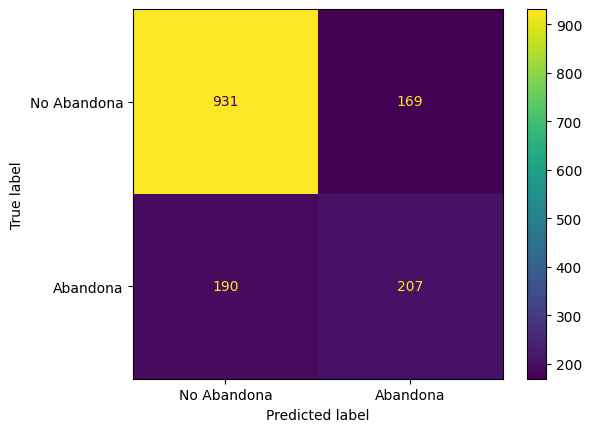

In [82]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['No Abandona', 'Abandona'])
visualizacion.plot();

##7.3.- Exactitud, precisión y recall (sensibilidad).

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [84]:
print(f'La precisión del modelo es: {precision_score(y_val, y_previsto)}')
print(f'La sensibilidad (recall) del modelo es: {recall_score(y_val, y_previsto)}')
print(f'La exactitud (accuracy) del modelo es: {accuracy_score(y_val, y_previsto)}')
print(f'La F1-score del modelo es: {f1_score(y_val, y_previsto)}')

La precisión del modelo es: 0.550531914893617
La sensibilidad (recall) del modelo es: 0.5214105793450882
La exactitud (accuracy) del modelo es: 0.760187040748163
La F1-score del modelo es: 0.535575679172057


##7.4.- Curva ROC

In [85]:
from sklearn.metrics import RocCurveDisplay

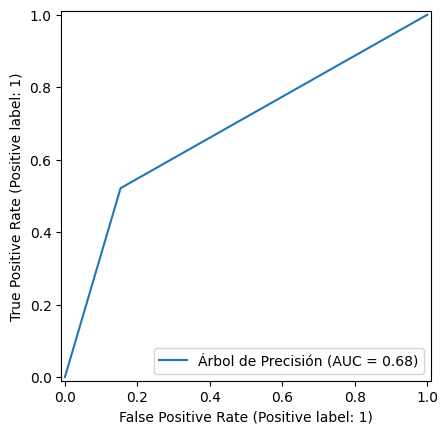

In [86]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Árbol de Precisión');

In [87]:
from sklearn.metrics import roc_auc_score

In [88]:
print(f'El área bajo la curva es: {roc_auc_score(y_val, y_previsto)}')

El área bajo la curva es: 0.6838871078543624


##7.5.- Curva de  precisión x sensibilidad

In [89]:
from sklearn.metrics import PrecisionRecallDisplay

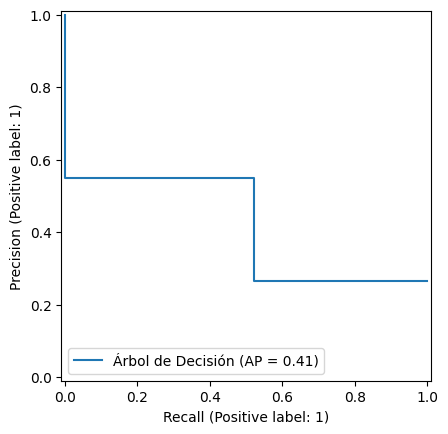

In [90]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Árbol de Decisión');

In [91]:
from sklearn.metrics import average_precision_score

In [92]:
print(f'El score promedio de Precisión vs Recall es: {average_precision_score(y_val, y_previsto)}')

El score promedio de Precisión vs Recall es: 0.4139736723746723


##7.6.- Informe de métricas

In [93]:
from sklearn.metrics import classification_report

In [94]:
print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      1100
         1.0       0.55      0.52      0.54       397

    accuracy                           0.76      1497
   macro avg       0.69      0.68      0.69      1497
weighted avg       0.76      0.76      0.76      1497



##7.7.- Validación cruzada

###7.7.1.- Usando KFold

In [95]:
from sklearn.model_selection import KFold, cross_validate

In [96]:
modelo_dtc = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_dtc, X, y, cv=kf)
cv_resultados

{'fit_time': array([0.029248  , 0.02886605, 0.04031181, 0.03487444, 0.02827907]),
 'score_time': array([0.00635743, 0.00306177, 0.00911093, 0.00321484, 0.0041759 ]),
 'test_score': array([0.77462437, 0.74018379, 0.75020886, 0.74686717, 0.75104428])}

In [97]:
cv_resultados['test_score']

array([0.77462437, 0.74018379, 0.75020886, 0.74686717, 0.75104428])

In [98]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de exactitud es de: {promedio}')
print(f'El desvio típico es de: {desvio_std}')
print(f'El Intervalo de confianza es: [{(promedio-2*desvio_std), (min(promedio+2*desvio_std,1))}]')

El promedio de exactitud es de: 0.7525856935047691
El desvio típico es de: 0.0116639395951659
El Intervalo de confianza es: [(np.float64(0.7292578143144373), np.float64(0.775913572695101))]


###7.7.2.- Validación cruzada con sensibilidad

In [99]:
def intervalo_confianza(resultado):
  promedio = resultado['test_score'].mean()
  desvio_std = resultado['test_score'].std()
  return f'El Intervalo de confianza es: [{(promedio-2*desvio_std), (min(promedio+2*desvio_std,1))}]'

In [100]:
modelo_dtc = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_dtc, X, y, cv=kf, scoring='recall')
cv_resultados

{'fit_time': array([0.02978063, 0.02866364, 0.02715182, 0.04686689, 0.05075645]),
 'score_time': array([0.00740671, 0.00686836, 0.00655413, 0.00716257, 0.00703573]),
 'test_score': array([0.48844884, 0.48387097, 0.48923077, 0.46835443, 0.49671053])}

In [101]:
modelo_dtc = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_dtc, X, y, cv=kf, scoring='precision')
cv_resultados

{'fit_time': array([0.05482912, 0.08439088, 0.10327053, 0.05044889, 0.07530737]),
 'score_time': array([0.02149296, 0.01623154, 0.0062027 , 0.01352572, 0.01765227]),
 'test_score': array([0.57142857, 0.54849498, 0.51973684, 0.51748252, 0.5033557 ])}

In [102]:
modelo_dtc = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_dtc, X, y, cv=kf, scoring='f1')
cv_resultados

{'fit_time': array([0.02817011, 0.02808452, 0.0321312 , 0.02791691, 0.02835369]),
 'score_time': array([0.00605226, 0.0067966 , 0.00713634, 0.00671816, 0.00640893]),
 'test_score': array([0.52797203, 0.51713396, 0.51273885, 0.49333333, 0.49498328])}

###7.7.3.- Estratificando los datos

In [103]:
datos.columns

Index(['onehotencoder__MultipleLines_No',
       'onehotencoder__MultipleLines_No phone service',
       'onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No', 'onehotencoder__OnlineSecurity_No',
       'onehotencoder__OnlineSecurity_Yes', 'onehotencoder__OnlineBackup_No',
       'onehotencoder__OnlineBackup_Yes', 'onehotencoder__DeviceProtection_No',
       'onehotencoder__DeviceProtection_Yes', 'onehotencoder__TechSupport_No',
       'onehotencoder__TechSupport_Yes', 'onehotencoder__StreamingTV_No',
       'onehotencoder__StreamingTV_Yes', 'onehotencoder__StreamingMovies_No',
       'onehotencoder__StreamingMovies_Yes',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMeth

In [104]:
datos['Churn'].value_counts(normalize=True)

,proportion
Churn,
0.0,0.73463
1.0,0.26537


In [105]:
from sklearn.model_selection import StratifiedKFold

In [106]:
modelo_dtc = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo_dtc, X, y, cv=skf, scoring='recall')

In [107]:
intervalo_confianza(cv_resultados)

'El Intervalo de confianza es: [(np.float64(0.43617161984539504), np.float64(0.5405956360719114))]'